<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# diabetes dataset for regression or classification: classify patients as having diabetes or not
# based on features such as patient age, sex, body mass index, average blood pressure, and six blood serum measurements 
# measured on 442 patients, and an indication of disease progression after one year

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.xkcd()
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import cv2   #openCV
from sklearn.linear_model import LogisticRegression


In [34]:
x, y = load_diabetes(return_X_y=True)
print('data set:', x.shape, y.shape)

# convert the problem into classification problem
print(x.shape)
print(y.shape)

y_ = np.zeros(y.shape)
y_[y>140] =1.
y_ = y_.astype(int)

xtrain, xtest, ytrain, ytest = train_test_split(x, y_, test_size=0.2, random_state=42, stratify=y_)
print('Train dataset:', xtrain.shape, ytrain.shape)
print('Test dataset:', xtest.shape, ytest.shape)
print(np.bincount(ytrain), np.bincount(ytest))

# computing the corrlation matrix
#C = np.corrcoef(x,x)
#print(C)

# standardize your data
min_max_scaler = MinMaxScaler(feature_range = (0,1))
xtrain_ = min_max_scaler.fit_transform(xtrain)
xtest_ = min_max_scaler.fit_transform(xtest)

print(xtrain_[0:5,])
print(ytrain[0:5,])


data set: (442, 10) (442,)
(442, 10)
(442,)
Train dataset: (353, 10) (353,)
Test dataset: (89, 10) (89,)
[176 177] [45 44]
[[0.66666667 1.         0.42180095 0.5915493  0.47783251 0.42330677
  0.27272727 0.42313117 0.54263407 0.72727273]
 [0.56666667 0.         0.28909953 0.6056338  0.42857143 0.35756972
  0.31168831 0.28208745 0.54549947 0.56060606]
 [0.05       0.         0.23696682 0.15492958 0.31527094 0.27988048
  0.41558442 0.14104372 0.20026662 0.5       ]
 [0.76666667 1.         0.57819905 0.50704225 0.60098522 0.59262948
  0.23376623 0.42313117 0.44356782 0.39393939]
 [0.55       0.         0.42654028 0.23004695 0.18226601 0.1563745
  0.28571429 0.14809591 0.41578987 0.16666667]]
[1 0 1 1 1]


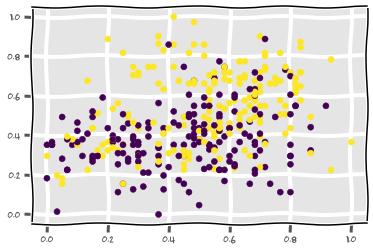

In [35]:
plt.figure()
plt.scatter(xtrain_[:,0], xtrain_[:,3], c=ytrain)
plt.grid()
plt.show()

In [ ]:
# feature selection using selectKBest

# build a model to regress diseas progression

(353, 10) (353,)
(89, 10) (89,)
[[33 12]
 [12 32]]


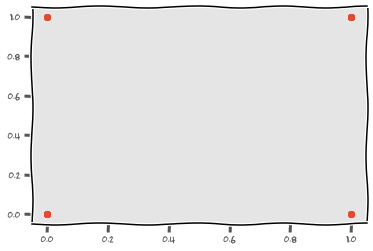

In [42]:
# build a model to classify patients
#(1) logistic regression classifier
print(xtrain_.shape, ytrain.shape)
print(xtest_.shape, ytest.shape)

model = LogisticRegression(penalty = 'l2', random_state = 0)
model.fit(xtrain_, ytrain)

#testing the classifier
ypred = model.predict(xtest_)
accuracy_score(ytest, ypred)

cm = confusion_matrix(ytest, ypred)
print(cm)

#t = np.arange(0, ytest.shape[0])
#plt.figure()
#plt.scatter(ytest,ypred)
#plt.show()